In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df1 = pd.read_csv("LOL_KR_CHALLENGER_Data.csv")
df2 = pd.read_csv("LOL_TW_CHALLENGER_Data.csv")

df = pd.concat([df1, df2])
df

,matchID,puuid,win,position,champion,level,kills,death,assists,goldEarned,TeamDragons,TeamHordes,TeamRiftHerald
0,KR_7171710346,npj15lzEGQS1NrHi3PoH0hK437aafKx4ygYWbS6M379OF2...,True,TOP,Gnar,18,8,7,6,15803,4,2,1
1,KR_7171710346,IxkESzQvMzKcDhjUJ-ScEel9ka3t0GNeC1nrq38tQGSHci...,True,UTILITY,Leona,17,3,9,19,11800,4,2,1
2,KR_7171710346,oMBwiSGKp8Y1IqGOfFAAo1C8Tjt_2ahTxZ3Q9sqqRhryMI...,True,MIDDLE,Azir,18,15,6,3,21315,4,2,1
3,KR_7171710346,5tW-0spx_kUg0JhbzAzBZ4yC8_PPNJ9_d5SCd_rV3zAKso...,True,JUNGLE,Viego,18,8,6,14,16259,4,2,1
4,KR_7171710346,0G6uFAVNalz9r6VVLxqPxyc6peHHGGpQk1BrveTMlO24wN...,True,BOTTOM,Zeri,18,8,7,10,20038,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25699,TW2_207562986,Gmhvi5ChS-Ct4dKZV-SVdX6L3xDurq7o-nZDT79k2pjMSP...,False,TOP,Poppy,11,1,7,4,6023,2,1,0
25700,TW2_207562986,bnAe1FHMyuzD8m5g7kaXc2suaZkGizcIw1GNRWrcjI0h2F...,False,JUNGLE,Ekko,11,3,5,3,7539,2,1,0
25701,TW2_207562986,PCzLOgUhuwy8bH1k5WtVtjw6RO5SY_juGgOCJpnEBV8fzi...,False,MIDDLE,Akshan,12,6,5,2,9009,2,1,0
25702,TW2_207562986,Vb6WyQXLQiu868hcIHUmwu2B9VH_1rdpqfKrCfE6mmVb9k...,False,BOTTOM,Zeri,10,3,7,8,7260,2,1,0


In [36]:
df[df["matchID"] == "TW2_219772755"]

,matchID,puuid,win,position,champion,level,kills,death,assists,goldEarned,TeamDragons,TeamHordes,TeamRiftHerald,gold_diff_from_lose,gold_diff_from_other
4508,TW2_219772755,r28-eX6_9KZMeA3DUzdTgRNudbqHieUBwQNSBfPZ07RkCB...,0,UTILITY,Nautilus,12,0,12,15,6416,0,3,0,0,-5366.0
4509,TW2_219772755,sZyEhPWyydktQtfMdpnIicCmTMQN-G7bG6T1l2gZf1VMXX...,0,JUNGLE,Graves,15,8,8,14,13725,0,3,0,0,109.0
4510,TW2_219772755,uizGc9PkmN1YZ1q2HuFB7_03E2B7UOHxomeQQae9DUOms6...,0,BOTTOM,Kaisa,14,9,8,11,12959,0,3,0,0,-2866.0
4511,TW2_219772755,Ygg_hQJnp4JDCQ-UbhV3l0JXilt1PK5XDK0ROVpX1lyUT8...,0,JUNGLE,Sylas,14,7,9,6,10096,0,3,0,-3629,109.0
4516,TW2_219772755,l3uuq8aPaD9whTKh604Yqj17WIDD4135dgG_fyImBWEuMc...,0,TOP,Tryndamere,15,8,7,5,12136,0,3,0,0,606.0
24796,TW2_219772755,Lf3Xv9Ig4urO3H_qr0u19LGIcPpNZDULuZPkffkuVArBt4...,1,UTILITY,Blitzcrank,13,7,8,25,11782,4,3,1,5366,5366.0
24797,TW2_219772755,pcBIV5zBdtgqcXyWUnBm1FKGetEEQSWSfbmKpPJuTRD51f...,1,JUNGLE,Lillia,16,7,10,13,13616,4,3,1,-109,-109.0
24798,TW2_219772755,2fK7bvhw_hww20AI2ckGxgBc5KQeMZRc61FG1X4_fu8Yud...,1,BOTTOM,Xayah,16,15,6,7,15825,4,3,1,2866,2866.0
24799,TW2_219772755,02uR91l7kaBhKfepc0umjv5E5M5Kz1kgXz7ryvMAEUQNtb...,1,MIDDLE,Cassiopeia,16,8,3,12,13984,4,3,1,0,0.0
24800,TW2_219772755,5M9uCiFlARUWT7r5PuHbIbZrEIgbYrdAM2i4w3aomApmFg...,1,TOP,Aatrox,15,7,6,8,11530,4,3,1,-606,-606.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51026 entries, 0 to 25703
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   matchID         51026 non-null  object
 1   puuid           51026 non-null  object
 2   win             51026 non-null  bool  
 3   position        51026 non-null  object
 4   champion        51026 non-null  object
 5   level           51026 non-null  int64 
 6   kills           51026 non-null  int64 
 7   death           51026 non-null  int64 
 8   assists         51026 non-null  int64 
 9   goldEarned      51026 non-null  int64 
 10  TeamDragons     51026 non-null  int64 
 11  TeamHordes      51026 non-null  int64 
 12  TeamRiftHerald  51026 non-null  int64 
dtypes: bool(1), int64(8), object(4)
memory usage: 5.1+ MB


In [4]:
df["position"].value_counts()

position
JUNGLE     9773
BOTTOM     9650
TOP        9622
MIDDLE     9613
UTILITY    9532
Invalid    2836
Name: count, dtype: int64

In [5]:
invalid_position = df[df["position"] == "Invalid"]["matchID"].unique()
df = df[~df["matchID"].isin(invalid_position)]
df.shape

(48040, 13)

In [6]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)
print(df.shape)

13420
(34620, 13)


C:\Users\PC\AppData\Local\Temp\ipykernel_23272\3496031266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [7]:
df["win"] = np.where(df["win"] == True, 1, 0)
df = df.sort_values(by = "win")
df = df.reset_index(drop = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_23272\218073051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["win"] = np.where(df["win"] == True, 1, 0)


In [8]:
df[["matchID", "position"]].value_counts()

matchID        position
TW2_208948155  UTILITY     5
TW2_213487993  JUNGLE      4
TW2_211284333  JUNGLE      4
TW2_211936912  JUNGLE      4
TW2_210608049  JUNGLE      4
                          ..
KR_7141415698  BOTTOM      1
TW2_213714506  UTILITY     1
               TOP         1
TW2_206424749  MIDDLE      1
TW2_213546109  TOP         1
Name: count, Length: 17306, dtype: int64

In [9]:
df["gold_diff_from_lose"] = df["goldEarned"] - df.groupby(["matchID", "position"])["goldEarned"].transform(lambda x : x.iloc[0])

In [10]:
df[df["matchID"] == "TW2_212582431"]

,matchID,puuid,win,position,champion,level,kills,death,assists,goldEarned,TeamDragons,TeamHordes,TeamRiftHerald,gold_diff_from_lose
316,TW2_212582431,4nr0InpdrXNKDZ_5p5CxC5sqPffofZGaWGgTpb226C101R...,0,BOTTOM,Zeri,13,6,8,1,12133,1,0,0,0
324,TW2_212582431,aZF9IYz4KGZ7yUKSlyQ4fbw-dkUCtDRierMAHm26EvdgcO...,0,UTILITY,Blitzcrank,11,0,8,7,6296,1,0,0,0
335,TW2_212582431,CqsjmUmrNHEBqSM4mKUL-l4Ao8AeBr_LSv9oe3pmbuvvx9...,0,JUNGLE,Ivern,12,0,5,3,7306,1,0,0,0
336,TW2_212582431,5i0ngCpgeIuf1sJ9tOJ6hweqzszFcg6Tv1qu4Y3wkfAPnU...,0,MIDDLE,Yasuo,15,2,9,2,10674,1,0,0,0
337,TW2_212582431,TaCZ6fGJaB8QeN5Z0LtwZVjz3IclGFtv-upQ905TtsH6ZW...,0,TOP,Riven,16,10,6,0,12951,1,0,0,0
32344,TW2_212582431,y3jpIqNXWaDPmQq9sHmHwscODrAnz3Z6qa75L-OHTTte1N...,1,BOTTOM,Cassiopeia,15,10,5,12,12991,3,6,0,858
32345,TW2_212582431,27F3AiAQYjz6LWGhEKj8lppCINqn20OsEIvayPUbredUL9...,1,JUNGLE,XinZhao,15,6,3,8,12129,3,6,0,4823
32346,TW2_212582431,oOOiP-dYKz9krZSPrfbAQkp0uH0cXbrtNAICnpThkWTMM2...,1,BOTTOM,Yone,17,11,2,6,14898,3,6,0,2765
32347,TW2_212582431,U51i_oBFhoejririPPTIO8TVcVRp39E9V5qeJzRxRCgwVQ...,1,UTILITY,Rell,14,2,2,21,8812,3,6,0,2516
32348,TW2_212582431,Disv9HpJnvPgkMrD9ngbeT7vG6AlEBNoRijMNvdO6-5QvG...,1,TOP,Gwen,16,7,6,6,11748,3,6,0,-1203


In [11]:
df["gold_diff_from_other"] = df["matchID"].astype(str) + " " + df["position"].astype(str)

group_df = df[df["win"] == 1].groupby("gold_diff_from_other").mean(numeric_only=True)["gold_diff_from_lose"] * (1)

group_df

gold_diff_from_other
KR_7098950605 BOTTOM     3413.0
KR_7098950605 JUNGLE     2051.0
KR_7098950605 MIDDLE      142.0
KR_7098950605 TOP        -339.0
KR_7098950605 UTILITY    1191.0
                          ...  
TW2_220070023 BOTTOM     4719.0
TW2_220070023 JUNGLE     -480.0
TW2_220070023 MIDDLE     1123.0
TW2_220070023 TOP        2351.0
TW2_220070023 UTILITY    2002.0
Name: gold_diff_from_lose, Length: 17254, dtype: float64

In [12]:
group_df_dict = group_df.to_dict()
group_df_dict


{'KR_7098950605 BOTTOM': 3413.0,
 'KR_7098950605 JUNGLE': 2051.0,
 'KR_7098950605 MIDDLE': 142.0,
 'KR_7098950605 TOP': -339.0,
 'KR_7098950605 UTILITY': 1191.0,
 'KR_7098966408 BOTTOM': -4999.0,
 'KR_7098966408 JUNGLE': 4475.0,
 'KR_7098966408 MIDDLE': 2605.0,
 'KR_7098966408 TOP': 640.0,
 'KR_7098966408 UTILITY': 392.0,
 'KR_7098981880 BOTTOM': 2068.0,
 'KR_7098981880 JUNGLE': -6.0,
 'KR_7098981880 MIDDLE': 477.0,
 'KR_7098981880 TOP': 987.0,
 'KR_7098981880 UTILITY': 2231.0,
 'KR_7098999126 BOTTOM': -523.0,
 'KR_7098999126 JUNGLE': -471.0,
 'KR_7098999126 MIDDLE': 3532.0,
 'KR_7098999126 TOP': 1829.0,
 'KR_7098999126 UTILITY': 1573.0,
 'KR_7099005742 BOTTOM': 5643.0,
 'KR_7099005742 JUNGLE': 443.0,
 'KR_7099005742 MIDDLE': 2025.0,
 'KR_7099005742 TOP': 1740.0,
 'KR_7099005742 UTILITY': -117.0,
 'KR_7099023526 BOTTOM': 3012.0,
 'KR_7099023526 JUNGLE': 3397.0,
 'KR_7099023526 MIDDLE': -680.0,
 'KR_7099023526 TOP': 1017.0,
 'KR_7099023526 UTILITY': 1693.0,
 'KR_7099031970 BOTTOM': 1740

In [13]:
df["gold_diff_from_other"] = df["gold_diff_from_other"].map(group_df_dict) 
df.groupby(["matchID", "position", "win"]).sum().head(20)


puuid  \
matchID       position win                                                      
KR_7098950605 BOTTOM   0    KrajiAwsI5_iYOQwihVdZrxAnRwlGdoWOkK0FQR9D4MNAE...   
                       1    O8r635d4_BY1gZOuuCyU_nM4iS8yNlvdxu3yQfQy-wrI6Z...   
              JUNGLE   0    vRHOg4HYdBmVTwMGeby8RSW_Xrpb83f8hlfVbF5RX-w278...   
                       1    6DRA9M5Tuwm_A-UiTfu7Ry3pmT5YvXtzY6fFjTn326_vtA...   
              MIDDLE   0    B-lwqDx5zg5HzjDQ-0-UbPCOBvL4hfVzqKV82sIiTeDvC5...   
                       1    UP0bTb1xRDsbrh0VoTxxOCQwBz4P9mAu08AJpxAXfsNs7e...   
              TOP      0    wxvRFX5AjWN3v0_7LY-hp_--V0SH3Sp9nd1HwHHsuwFe1x...   
                       1    MXVK32Yx_qD1Y8eV8kJSgT-t7k1LDABqae3OOeqoj-Tmeq...   
              UTILITY  0    JIwDabvGthlwlA1Yohiw2k2f0ddjzx7KCyQuPcA7PeB-rh...   
                       1    42tH6_d7gOHRmch0cLwZsNjbe1SqU7wv936QD51-i4nMq-...   
KR_7098966408 BOTTOM   0    j_O8zPUYf1QjFNQrvDLNUGSU62P83CwX47WVIt-mB3lkg8...   
                       1    RkkfK-blOl3Uvp4QlZy78emXUWvLFu-uwuiPz0aOK6Q2TN...   
              JUNGLE   0    UXFxPRXlfXPElJWiKVl_AlgZDa1C2u7rnZBvxjliVbshuM...   
                       1    6DRA9M5Tuwm_A-UiTfu7Ry3pmT5YvXtzY6fFjTn326_vtA...   
              MIDDLE   0    -g8OqWj7lZIzmk7ZEW5ptaZct6aWOgiT7XBfAoql9o46XP...   
                       1    e1KlFQnrFAyn6jAFcS95loHpQh88o6vApxqkoa7iNn2tk7...   
              TOP      0    UP0bTb1xRDsbrh0VoTxxOCQwBz4P9mAu08AJpxAXfsNs7e...   
                       1    IERCdymvfHgcI23roV6gFtH2dyQagTPjktirexgH9cvsyA...   
              UTILITY  0    Q_2FJRPOGz0wp1r_NFdWrK4XPBdYDaS6vGk81zc16kvHxj...   
                       1    Z2595u82z2EPfeq9eRcntaPAUSB5jvDj7QOxp95T7JsObA...   

                             champion  level  kills  death  assists  \
matchID       position win                                            
KR_7098950605 BOTTOM   0        Xayah     10      3      3        1   
                       1        Kaisa     12      8      1        5   
              JUNGLE   0      Hecarim     10      5      3        0   
                       1       Graves     12      7      3        6   
              MIDDLE   0          Lux     12      1      6        3   
                       1        Sylas     12      2      3        5   
              TOP      0      Skarner     12      4      2        4   
                       1         Gnar     12      2      6        5   
              UTILITY  0        Rakan      8      0      6        4   
                       1         Rell      9      1      1       13   
KR_7098966408 BOTTOM   0       Draven     16     11      2        1   
                       1        Nilah     18      5      5        2   
              JUNGLE   0      Taliyah     16      2      7        8   
                       1       Graves     18     13      4        4   
              MIDDLE   0        Viego     15      1      8        3   
                       1         Ahri     18      4      2       11   
              TOP      0          Jax     15      1      3        2   
                       1     Pantheon     18      3      1       10   
              UTILITY  0         Hwei     14      0      6       12   
                       1    Seraphine     15      1      3       17   

                            goldEarned  TeamDragons  TeamHordes  \
matchID       position win                                        
KR_7098950605 BOTTOM   0          6846            0           5   
                       1         10259            2           1   
              JUNGLE   0          6850            0           5   
                       1          8901            2           1   
              MIDDLE   0          6615            0           5   
                       1          6757            2           1   
              TOP      0          7351            0           5   
                       1          7012            2           1   
              UTILITY  0          4143            0     

In [14]:
df.loc[df["win"] == 0, "gold_diff_from_other"] = df[df["win"] == 0]["gold_diff_from_other"]*(-1)


In [15]:
print(df[df["gold_diff_from_other"].isnull()].shape)
df = df.dropna(subset="gold_diff_from_other").reset_index(drop = True)
print(df[df["gold_diff_from_other"].isnull()].shape)

(55, 15)
(0, 15)


In [16]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' drops the first category to avoid multicollinearity

# Fit and transform the satisfaction columnX
transformed_data = encoder.fit_transform(df[["position"]])

# Create a DataFrame from the transformed data with appropriartfte column names
transformed_df = pd.DataFrame(transformed_data, columns=encoder.get_feature_names_out(["position"]))

# Concatenate the transformed columns with the original DataFrame
encoded_df = pd.concat([df, transformed_df], axis=1)


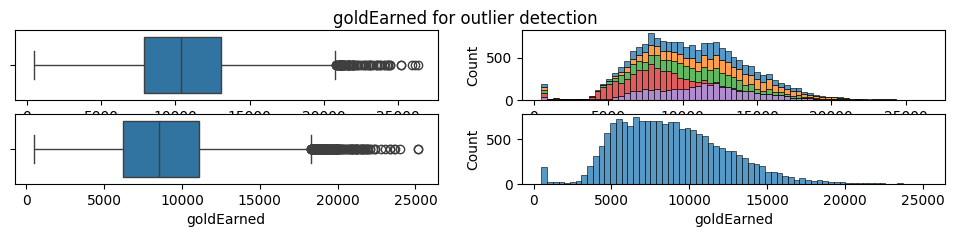

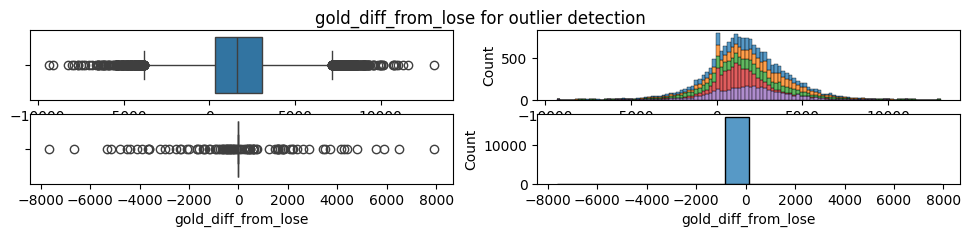

In [17]:
def outlierploter(da, column):
    fig, axes = plt.subplots(2, 2, figsize = (12, 2))
    fig.suptitle(f"{column} for outlier detection")
    sns.boxplot(ax = axes[0][0], data = da[da["win"] == 1], x = column)
    sns.histplot(ax = axes[0][1], data = da[da["win"] == 1], x = column, hue = "position", multiple = "stack", legend = None)
    sns.boxplot(ax = axes[1][0], data = da[da["win"] == 0], x = column)
    sns.histplot(ax = axes[1][1], data = da[da["win"] == 0], x = column)
    # plt.figure(figsize = (7, 1))
    # plt.title(f"Boxplot to detect outlier for {column}")
    # plt.xticks(fontsize = 9)
    # plt.yticks(fontsize = 9)
    # sns.boxplot(data = encoded_df[encoded_df["win"] ==1], x = column)
    plt.show()


outlierploter(encoded_df, "goldEarned")
outlierploter(encoded_df, "gold_diff_from_lose")


In [18]:
S = encoded_df[(encoded_df["win"] == 0) & encoded_df["gold_diff_from_lose"] != 0]["matchID"].unique()
encoded_df[encoded_df["matchID"].isin(S)].groupby(["matchID", "position", "win"]).sum().head(20)

puuid  \
matchID       position win                                                      
KR_7117950127 BOTTOM   0    hONQ-qsiGNEkmTCqlw9etTApzIGsgYbiJx1-OiURXqfQwx...   
                       1    rSqmMHpIL-yMZ44xLDqkrj0PcW4tvU9WI2Lastv6WnwqK1...   
              JUNGLE   0    iFDVm1XpiKi3aYun7WdsVIZjv2j5XLp7gmAfKnHQAc703K...   
                       1    IKOK7lNYhYOXpK4MdPiWEPw25s_qbGi3sBvQCMHiWSmo81...   
              MIDDLE   0    Tg-fRJR4sd2gRISf513X-Z_JUyfD66aZvt8RtRh8IlXXUc...   
                       1    ZFQCfwaCDPtePT4PgE_dTrYwXcxdozuO3-5zhT5IrPQg3K...   
              TOP      0    6IHHQvZji8NZtRLGQJ6IGczdTje6fpqitV-2UCN_NEhQZn...   
                       1    yycZLfBh_bmZ21jh-rCFEkLG_lBnZxXiOv8DUn8bfT99P1...   
              UTILITY  1    rFzACanPOZnhjt5xwWw_8amezHD0GL9ssZYhaRdNQ1RhDL...   
KR_7126429919 BOTTOM   0    cRiuXZ2ZnvYUhB3r5fGFjcbuG80yASmOTw_hL5LA19Qkyd...   
                       1    keXnNQ9no18dOjYBQmfmjvChapkIcF2j9JN-vWiAnFL5y0...   
              JUNGLE   0    A7XILaBDhvQ7u8iZIBbHmmenYlTCOsmLFFf8K29KdvKeAm...   
                       1    _iy6yrWO7z7RSqOyQbnq_l6KsYVqRsiRWXZAh47zhw6it1...   
              MIDDLE   0    VBZMMlUs93DgqqnRlN6qChuQqFO8vyRkKfIQGEzjvBfEFj...   
                       1    AsAY9v15eTDBk4yjkMxfZH17BgCVs-e7pb9y0Pxkg7JcyF...   
              TOP      0    QcSVTWuhkF7b-2RlOlUpt7AUgMUxuKOgFFN1X9euH0CWMH...   
                       1    KNHDjOHUUAVjZNRyNFV11IZYt3PrRsCZ8s5zFHQMGMt9Lw...   
              UTILITY  1    dej6nch4uhR_ytAAUBMu4YUguHR4ZhzZ8yDeHW08X0r_K1...   
KR_7140632230 BOTTOM   0    GbwpjutzvRsQAy7o8l42aBoz-flwezLoWCRIWEyWs8g1ln...   
                       1    FoMsfd4dOxKk9cbcYZTMfGP2TZ-L4keW8GQ4RtdCDKpMuS...   

                                   champion  level  kills  death  assists  \
matchID       position win                                                  
KR_7117950127 BOTTOM   0         Cassiopeia     10      0      6        0   
                       1              Kaisa     13     11      2        7   
              JUNGLE   0       KindredLeona     21      4     10        6   
                       1             LeeSin     14      6      1        9   
              MIDDLE   0              Corki     14      4      3        3   
                       1                Vex     13      2      2        3   
              TOP      0              Fiora     13      1      6        1   
                       1            Camille     15      5      3        5   
              UTILITY  1               Rell     11      1      1       18   
KR_7126429919 BOTTOM   0               Jhin      9      3      4        3   
                       1               Ashe     10      7      2        6   
              JUNGLE   0    NidaleeNautilus     16      2     11       10   
                       1              Diana     11      7      0        2   
              MIDDLE   0              Yasuo     11      5      2        2   
                       1              Corki     10      0      5        3   
              TOP      0           Renekton     10      1      2        0   
                       1             Rumble     12      4      1        0   
              UTILITY  1              Braum      8      1      3        8   
KR_7140632230 BOTTOM   0         RakanKaisa     19      7     13       11   
                       1             Ezreal     12     11      7        6   

                            goldEarned  TeamDragons  TeamHordes  \
matchID       position win                                        
KR_7117950127 BOTTOM   0          5939            0           3   
                       1         11619            3           3   
              JUNGLE   0         14463            0           6   
                       1         10227            3           3   
              MIDDLE   0         10980            0           3   
                       1          8321            3           3   
              TOP      0          9372            0       

105      TW2_209885031
215      TW2_212788905
230      TW2_212962503
836      TW2_209794723
1456     TW2_207168585
             ...      
15366    KR_7140632230
15751    KR_7171377191
16737    KR_7141415698
16979    KR_7151193525
16991    KR_7141747185
Name: matchID, Length: 94, dtype: object
(33704, 19)


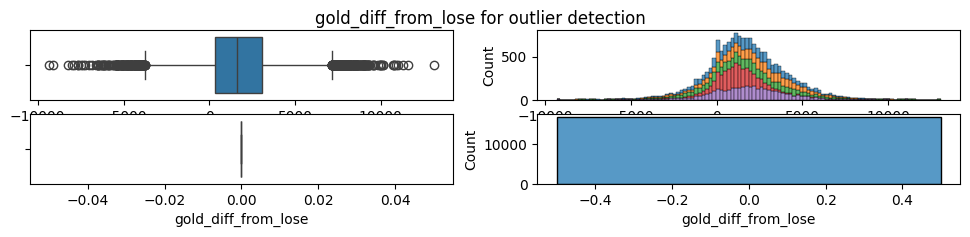

In [19]:
invalid_games = encoded_df[(encoded_df["gold_diff_from_lose"] != 0) & (encoded_df["win"] == 0) ]["matchID"]
print(invalid_games)
encoded_df = encoded_df[~encoded_df["matchID"].isin(invalid_games)]
encoded_df = encoded_df.drop_duplicates()
print(encoded_df.shape)
outlierploter(encoded_df, "gold_diff_from_lose")

In [20]:
encoded_df[encoded_df["goldEarned"] == 500].shape

(216, 19)

<Axes: xlabel='goldEarned', ylabel='Count'>

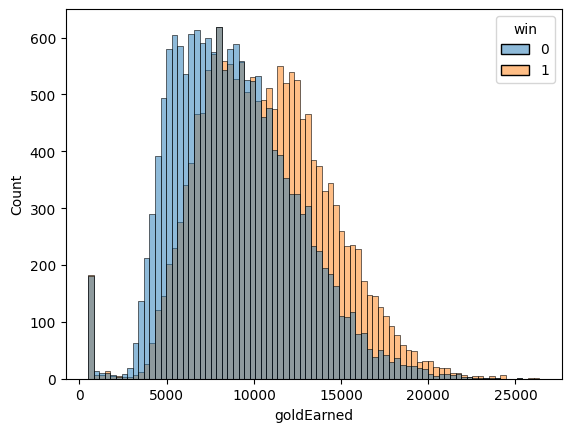

In [21]:
sns.histplot(encoded_df, x = "goldEarned", hue = "win")

In [22]:
Invalid_game = encoded_df[encoded_df["goldEarned"] == 500]["matchID"].unique()
Invalid_game

array(['TW2_216616237', 'TW2_209923792', 'TW2_208250464', 'TW2_207967130',
       'TW2_203886331', 'TW2_213372195', 'KR_7140464799', 'KR_7108975912',
       'KR_7109007080', 'TW2_208820356', 'TW2_211976322', 'TW2_213549591',
       'KR_7126146377', 'TW2_209541266', 'TW2_205569478', 'TW2_207005215',
       'TW2_209234887', 'TW2_213833465', 'TW2_212770156', 'TW2_213420053',
       'TW2_213578463', 'TW2_219342918', 'TW2_213594286', 'TW2_212881781',
       'KR_7109025494', 'KR_7149110268', 'KR_7141539440'], dtype=object)

In [23]:
final_df = encoded_df[~encoded_df["matchID"].isin(Invalid_game)]
final_df[final_df["goldEarned"] == 500].shape


(0, 19)

In [24]:
# x = final_df[["position_JUNGLE", "position_MIDDLE", "position_TOP", "position_UTILITY"]]
x = final_df.drop(columns=["matchID", "win", "puuid", "position", "champion"])
y = final_df['win']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [25]:
log_clf = LogisticRegression(random_state = 0, max_iter = 800).fit(x_train, y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
y_pred = log_clf.predict(x_test)

In [27]:
# log_cm = confusion_matrix(y_test, y_pred)
# log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm)
# log_disp.plot()
# plt.show()

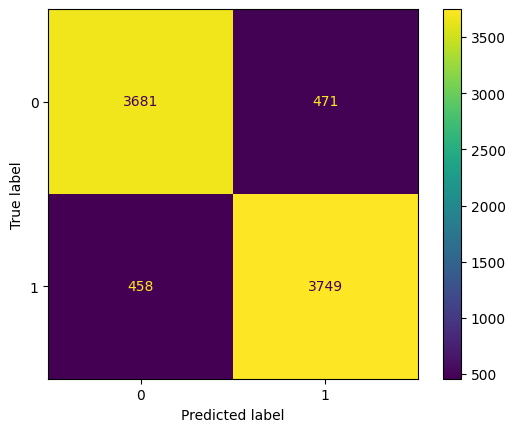

In [28]:
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)
log_disp.plot()
plt.show()

In [29]:
target_labels = ["Lose", "Win"]
print(classification_report(y_test, y_pred, target_names = target_labels))

              precision    recall  f1-score   support

        Lose       0.89      0.89      0.89      4152
         Win       0.89      0.89      0.89      4207

    accuracy                           0.89      8359
   macro avg       0.89      0.89      0.89      8359
weighted avg       0.89      0.89      0.89      8359



In [30]:
pd.DataFrame(data = {"Feature Name" : log_clf.feature_names_in_, "Model Coefficient" : log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,level,-0.062541
1,kills,0.083249
2,death,-0.358775
3,assists,0.231777
4,goldEarned,-0.000207
5,TeamDragons,1.081372
6,TeamHordes,0.259494
7,TeamRiftHerald,1.225999
8,gold_diff_from_lose,0.000016
9,gold_diff_from_other,0.000560


In [31]:
import pandas as pd

final_df.to_csv('Test.csv')



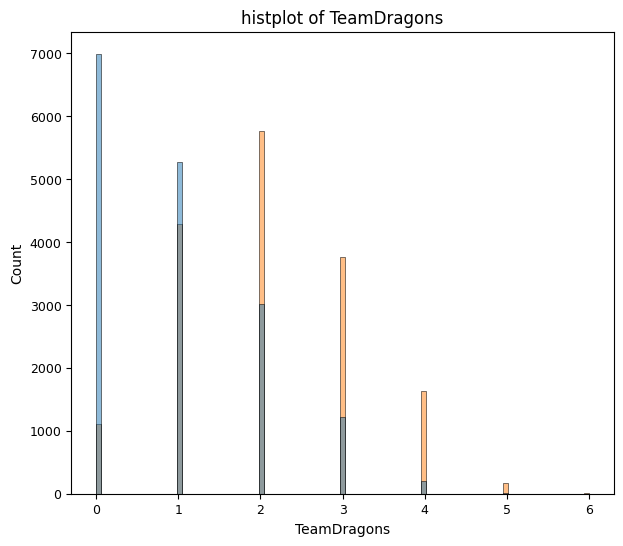

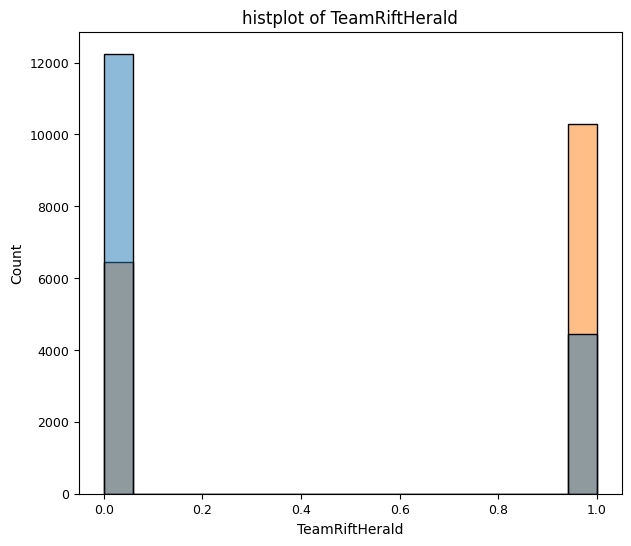

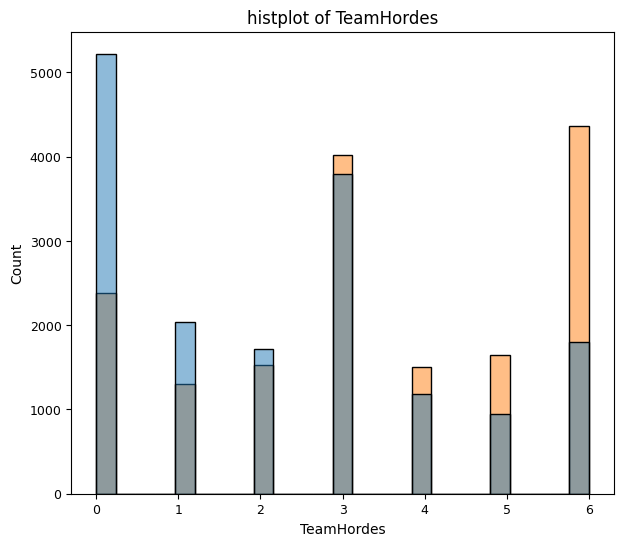

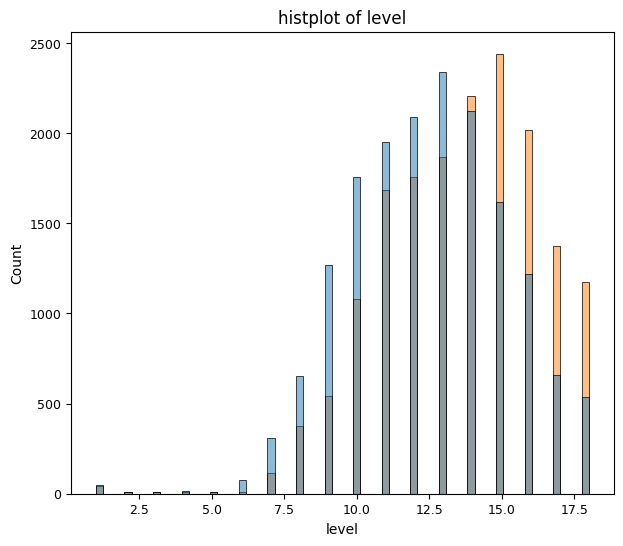

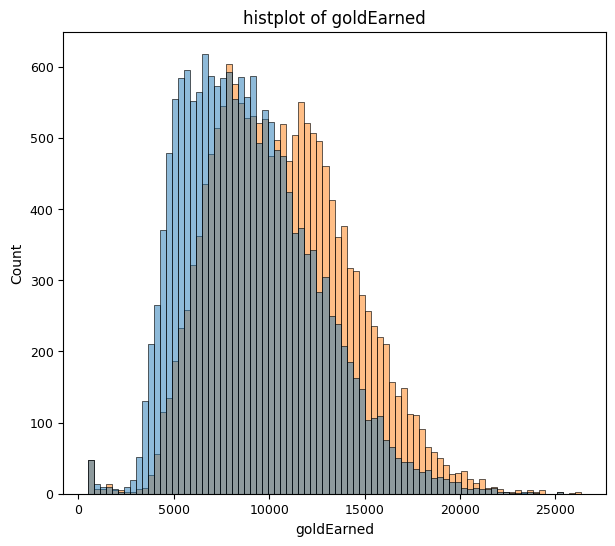

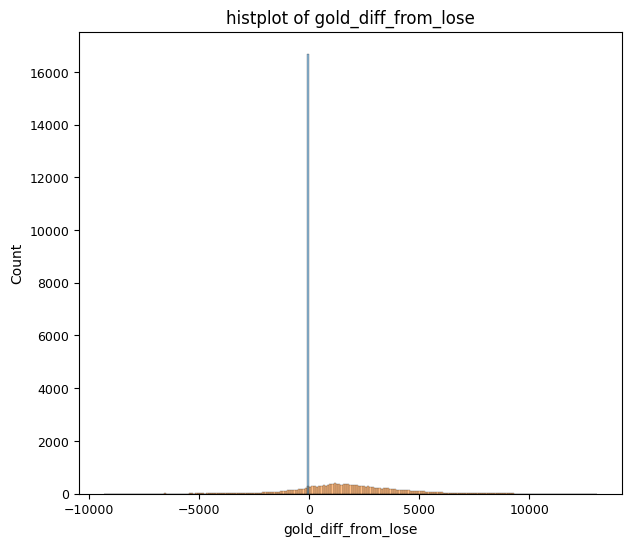

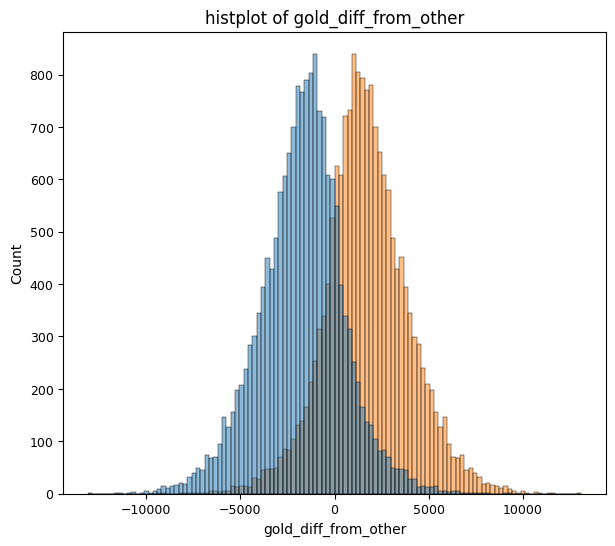

In [32]:
def histploter(column, **kwargs):
    plt.figure(figsize = (7, 6))
    plt.title(f"histplot of {column}")
    plt.xticks(fontsize = 9)
    plt.yticks(fontsize = 9)
    sns.histplot(data = final_df, x = column, hue = "win",legend = None, **kwargs)
    plt.show()

histploter("TeamDragons")
histploter("TeamRiftHerald")
histploter("TeamHordes")
histploter("level")
histploter("goldEarned")

histploter("gold_diff_from_lose")
histploter("gold_diff_from_other")



